### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第79天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/06/09
### 改版日期:  
### 改版備註:

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

### ANS:

In [1]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

####  設定MOMENTUM = [0.95,0.90,0.85,0.80,0.75]，並啟用nesterov

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM_LIST = [0.95,0.90,0.85,0.80,0.75]

In [7]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM_LIST):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.95
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/5

50000/50000 [==============================] - 10s 194us/step - loss: 1.4120 - accuracy: 0.5059 - val_loss: 1.7668 - val_accuracy: 0.3989
Epoch 49/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.4101 - accuracy: 0.5073 - val_loss: 1.5941 - val_accuracy: 0.4510
Epoch 50/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.4017 - accuracy: 0.5076 - val_loss: 1.6165 - val_accuracy: 0.4545
Experiment with LR = 0.100000, Momentum = 0.90
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________

50000/50000 [==============================] - 10s 204us/step - loss: 1.2448 - accuracy: 0.5541 - val_loss: 1.7856 - val_accuracy: 0.4394
Epoch 46/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.2412 - accuracy: 0.5551 - val_loss: 1.6732 - val_accuracy: 0.4576
Epoch 47/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.2268 - accuracy: 0.5613 - val_loss: 1.7401 - val_accuracy: 0.4439
Epoch 48/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.2196 - accuracy: 0.5626 - val_loss: 1.6925 - val_accuracy: 0.4452
Epoch 49/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.2150 - accuracy: 0.5650 - val_loss: 1.7164 - val_accuracy: 0.4528
Epoch 50/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.2155 - accuracy: 0.5651 - val_loss: 1.6740 - val_accuracy: 0.4556
Experiment with LR = 0.100000, Momentum = 0.85
Model: "model_1"
________________________________________________

50000/50000 [==============================] - 10s 207us/step - loss: 1.0536 - accuracy: 0.6201 - val_loss: 1.7862 - val_accuracy: 0.4425
Epoch 43/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.0467 - accuracy: 0.6230 - val_loss: 1.6263 - val_accuracy: 0.4759
Epoch 44/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.0235 - accuracy: 0.6309 - val_loss: 1.6769 - val_accuracy: 0.4754
Epoch 45/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.0206 - accuracy: 0.6344 - val_loss: 1.6681 - val_accuracy: 0.4783
Epoch 46/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.0017 - accuracy: 0.6402 - val_loss: 1.7568 - val_accuracy: 0.4633
Epoch 47/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.0074 - accuracy: 0.6378 - val_loss: 1.7054 - val_accuracy: 0.4836
Epoch 48/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.9840 - accuracy: 0.6459 - va

50000/50000 [==============================] - 11s 220us/step - loss: 1.0445 - accuracy: 0.6216 - val_loss: 1.6843 - val_accuracy: 0.4687
Epoch 40/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.0310 - accuracy: 0.6260 - val_loss: 1.6341 - val_accuracy: 0.4830
Epoch 41/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.0142 - accuracy: 0.6319 - val_loss: 1.6050 - val_accuracy: 0.4735
Epoch 42/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.0049 - accuracy: 0.6372 - val_loss: 1.6520 - val_accuracy: 0.4823
Epoch 43/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.9943 - accuracy: 0.6393 - val_loss: 1.6537 - val_accuracy: 0.4763
Epoch 44/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.9803 - accuracy: 0.6421 - val_loss: 1.6269 - val_accuracy: 0.4710
Epoch 45/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.9723 - accuracy: 0.6466 - va

50000/50000 [==============================] - 11s 221us/step - loss: 0.9611 - accuracy: 0.6529 - val_loss: 1.6051 - val_accuracy: 0.4926
Epoch 37/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.9457 - accuracy: 0.6559 - val_loss: 1.6822 - val_accuracy: 0.4673
Epoch 38/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.9285 - accuracy: 0.6638 - val_loss: 1.6841 - val_accuracy: 0.4883
Epoch 39/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.9189 - accuracy: 0.6671 - val_loss: 1.7762 - val_accuracy: 0.4528
Epoch 40/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.9032 - accuracy: 0.6737 - val_loss: 1.7765 - val_accuracy: 0.4756
Epoch 41/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.8899 - accuracy: 0.6763 - val_loss: 1.8153 - val_accuracy: 0.4648
Epoch 42/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.8770 - accuracy: 0.6825 - va

50000/50000 [==============================] - 11s 219us/step - loss: 0.6644 - accuracy: 0.7625 - val_loss: 1.6055 - val_accuracy: 0.5348
Epoch 34/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.6492 - accuracy: 0.7675 - val_loss: 1.6670 - val_accuracy: 0.5209
Epoch 35/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.6281 - accuracy: 0.7749 - val_loss: 1.6344 - val_accuracy: 0.5330
Epoch 36/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.6159 - accuracy: 0.7809 - val_loss: 1.6879 - val_accuracy: 0.5411
Epoch 37/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.5812 - accuracy: 0.7919 - val_loss: 1.7188 - val_accuracy: 0.5326
Epoch 38/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.5613 - accuracy: 0.7983 - val_loss: 1.7666 - val_accuracy: 0.5327
Epoch 39/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.5531 - accuracy: 0.8006 - va

50000/50000 [==============================] - 11s 220us/step - loss: 0.8000 - accuracy: 0.7179 - val_loss: 1.4813 - val_accuracy: 0.5187
Epoch 31/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7818 - accuracy: 0.7243 - val_loss: 1.5179 - val_accuracy: 0.5216
Epoch 32/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7576 - accuracy: 0.7315 - val_loss: 1.5178 - val_accuracy: 0.5150
Epoch 33/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.7446 - accuracy: 0.7363 - val_loss: 1.4713 - val_accuracy: 0.5419
Epoch 34/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.7166 - accuracy: 0.7464 - val_loss: 1.5152 - val_accuracy: 0.5323
Epoch 35/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.6948 - accuracy: 0.7559 - val_loss: 1.5093 - val_accuracy: 0.5326
Epoch 36/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.6838 - accuracy: 0.7574 - va

50000/50000 [==============================] - 11s 217us/step - loss: 0.9576 - accuracy: 0.6621 - val_loss: 1.4249 - val_accuracy: 0.5227
Epoch 28/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.9455 - accuracy: 0.6669 - val_loss: 1.3722 - val_accuracy: 0.5359
Epoch 29/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.9162 - accuracy: 0.6771 - val_loss: 1.5546 - val_accuracy: 0.4837
Epoch 30/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.9040 - accuracy: 0.6823 - val_loss: 1.4787 - val_accuracy: 0.5082
Epoch 31/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.8857 - accuracy: 0.6868 - val_loss: 1.4634 - val_accuracy: 0.5217
Epoch 32/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.8625 - accuracy: 0.6983 - val_loss: 1.4205 - val_accuracy: 0.5324
Epoch 33/50
50000/50000 [==============================] - 11s 217us/step - loss: 0.8416 - accuracy: 0.7040 - va

50000/50000 [==============================] - 11s 222us/step - loss: 1.0923 - accuracy: 0.6140 - val_loss: 1.3357 - val_accuracy: 0.5318
Epoch 25/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.0857 - accuracy: 0.6171 - val_loss: 1.4604 - val_accuracy: 0.5029
Epoch 26/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.0622 - accuracy: 0.6258 - val_loss: 1.4212 - val_accuracy: 0.5088
Epoch 27/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.0502 - accuracy: 0.6304 - val_loss: 1.6555 - val_accuracy: 0.4573
Epoch 28/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.0310 - accuracy: 0.6350 - val_loss: 1.4415 - val_accuracy: 0.5121
Epoch 29/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.0192 - accuracy: 0.6398 - val_loss: 1.4012 - val_accuracy: 0.5160
Epoch 30/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.9923 - accuracy: 0.6496 - va

50000/50000 [==============================] - 11s 220us/step - loss: 1.1892 - accuracy: 0.5800 - val_loss: 1.3711 - val_accuracy: 0.5169
Epoch 22/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.1796 - accuracy: 0.5862 - val_loss: 1.4273 - val_accuracy: 0.5038
Epoch 23/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.1614 - accuracy: 0.5893 - val_loss: 1.3753 - val_accuracy: 0.5154
Epoch 24/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.1417 - accuracy: 0.5985 - val_loss: 1.3683 - val_accuracy: 0.5222
Epoch 25/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.1301 - accuracy: 0.6038 - val_loss: 1.3902 - val_accuracy: 0.5172
Epoch 26/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.1138 - accuracy: 0.6063 - val_loss: 1.4892 - val_accuracy: 0.4812
Epoch 27/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.0948 - accuracy: 0.6117 - va

50000/50000 [==============================] - 11s 221us/step - loss: 1.2881 - accuracy: 0.5473 - val_loss: 1.3877 - val_accuracy: 0.5038
Epoch 19/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.2721 - accuracy: 0.5522 - val_loss: 1.4339 - val_accuracy: 0.4919
Epoch 20/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.2565 - accuracy: 0.5587 - val_loss: 1.3881 - val_accuracy: 0.5049
Epoch 21/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.2400 - accuracy: 0.5633 - val_loss: 1.3614 - val_accuracy: 0.5206
Epoch 22/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.2258 - accuracy: 0.5691 - val_loss: 1.3624 - val_accuracy: 0.5208
Epoch 23/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.2113 - accuracy: 0.5726 - val_loss: 1.3945 - val_accuracy: 0.5068
Epoch 24/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.1990 - accuracy: 0.5785 - va

50000/50000 [==============================] - 10s 202us/step - loss: 1.4962 - accuracy: 0.4790 - val_loss: 1.5357 - val_accuracy: 0.4524
Epoch 16/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.4829 - accuracy: 0.4828 - val_loss: 1.5187 - val_accuracy: 0.4650
Epoch 17/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.4676 - accuracy: 0.4884 - val_loss: 1.5013 - val_accuracy: 0.4664
Epoch 18/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.4539 - accuracy: 0.4927 - val_loss: 1.4852 - val_accuracy: 0.4736
Epoch 19/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.4417 - accuracy: 0.4960 - val_loss: 1.4749 - val_accuracy: 0.4797
Epoch 20/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.4282 - accuracy: 0.4998 - val_loss: 1.4713 - val_accuracy: 0.4771
Epoch 21/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.4152 - accuracy: 0.5040 - va

50000/50000 [==============================] - 10s 202us/step - loss: 1.6118 - accuracy: 0.4355 - val_loss: 1.6152 - val_accuracy: 0.4374
Epoch 13/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5958 - accuracy: 0.4398 - val_loss: 1.5991 - val_accuracy: 0.4404
Epoch 14/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5810 - accuracy: 0.4447 - val_loss: 1.6001 - val_accuracy: 0.4358
Epoch 15/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5673 - accuracy: 0.4510 - val_loss: 1.5782 - val_accuracy: 0.4487
Epoch 16/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5541 - accuracy: 0.4551 - val_loss: 1.5724 - val_accuracy: 0.4498
Epoch 17/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5423 - accuracy: 0.4598 - val_loss: 1.5698 - val_accuracy: 0.4522
Epoch 18/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.5300 - accuracy: 0.4647 - va

50000/50000 [==============================] - 11s 225us/step - loss: 1.7059 - accuracy: 0.4040 - val_loss: 1.7059 - val_accuracy: 0.3999
Epoch 10/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.6866 - accuracy: 0.4109 - val_loss: 1.6858 - val_accuracy: 0.4045
Epoch 11/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.6689 - accuracy: 0.4170 - val_loss: 1.6826 - val_accuracy: 0.4102
Epoch 12/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.6528 - accuracy: 0.4220 - val_loss: 1.6514 - val_accuracy: 0.4192
Epoch 13/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.6369 - accuracy: 0.4286 - val_loss: 1.6414 - val_accuracy: 0.4235
Epoch 14/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6232 - accuracy: 0.4339 - val_loss: 1.6303 - val_accuracy: 0.4287
Epoch 15/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.6097 - accuracy: 0.4378 - va

50000/50000 [==============================] - 13s 261us/step - loss: 1.7984 - accuracy: 0.3743 - val_loss: 1.8001 - val_accuracy: 0.3676
Epoch 7/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.7745 - accuracy: 0.3836 - val_loss: 1.7743 - val_accuracy: 0.3836
Epoch 8/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.7536 - accuracy: 0.3899 - val_loss: 1.7496 - val_accuracy: 0.3885
Epoch 9/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.7349 - accuracy: 0.3972 - val_loss: 1.7302 - val_accuracy: 0.3929
Epoch 10/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.7181 - accuracy: 0.4035 - val_loss: 1.7166 - val_accuracy: 0.3992
Epoch 11/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.7026 - accuracy: 0.4079 - val_loss: 1.7016 - val_accuracy: 0.4013
Epoch 12/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.6879 - accuracy: 0.4133 - val_l

50000/50000 [==============================] - 13s 256us/step - loss: 2.0482 - accuracy: 0.2894 - val_loss: 2.0145 - val_accuracy: 0.3016
Epoch 4/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.9912 - accuracy: 0.3061 - val_loss: 1.9660 - val_accuracy: 0.3220
Epoch 5/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.9471 - accuracy: 0.3229 - val_loss: 1.9268 - val_accuracy: 0.3303
Epoch 6/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.9124 - accuracy: 0.3342 - val_loss: 1.8966 - val_accuracy: 0.3431
Epoch 7/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.8835 - accuracy: 0.3441 - val_loss: 1.8706 - val_accuracy: 0.3520
Epoch 8/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.8597 - accuracy: 0.3532 - val_loss: 1.8506 - val_accuracy: 0.3581
Epoch 9/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.8399 - accuracy: 0.3590 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.2590 - accuracy: 0.1707 - val_loss: 2.2101 - val_accuracy: 0.2097
Epoch 2/50
50000/50000 [==============================] - 13s 263us/step - loss: 2.1775 - accuracy: 0.2253 - val_loss: 2.1469 - val_accuracy: 0.2419
Epoch 3/50
50000/50000 [==============================] - 13s 263us/step - loss: 2.1219 - accuracy: 0.2485 - val_loss: 2.0991 - val_accuracy: 0.2624
Epoch 4/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.0790 - accuracy: 0.2685 - val_loss: 2.0607 - val_accuracy: 0.2787
Epoch 5/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.0433 - accuracy: 0.2838 - val_loss: 2.0285 - val_accuracy: 0.2909
Epoch 6/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.0131 - accuracy: 0.2961 - val_loss: 2.0017 - val_accuracy: 0.2990
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.2823 - accuracy: 0.1434 - val_loss: 2.2428 - val_accuracy: 0.1784
Epoch 2/50
50000/50000 [==============================] - 13s 260us/step - loss: 2.2167 - accuracy: 0.1982 - val_loss: 2.1923 - val_accuracy: 0.2158
Epoch 3/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.1709 - accuracy: 0.2276 - val_loss: 2.1509 - val_accuracy: 0.2428
Epoch 4/50
50000/50000 [==============================] - 13s 259us/step - loss: 2.1333 - accuracy: 0.2489 - val_loss: 2.1168 - val_accuracy: 0.2625
Epoch 5/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.1019 - accuracy: 0.2636 - val_loss: 2.0878 - val_accuracy: 0.2760
Epoch 6/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.0745 - accuracy: 0.2755 - val_loss: 2.0618 - val_accuracy: 0.2888
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.2807 - accuracy: 0.1312 - val_loss: 2.2576 - val_accuracy: 0.1470
Epoch 2/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.2391 - accuracy: 0.1734 - val_loss: 2.2218 - val_accuracy: 0.1969
Epoch 3/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.2071 - accuracy: 0.2075 - val_loss: 2.1919 - val_accuracy: 0.2198
Epoch 4/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.1793 - accuracy: 0.2274 - val_loss: 2.1649 - val_accuracy: 0.2329
Epoch 5/50
50000/50000 [==============================] - 14s 272us/step - loss: 2.1535 - accuracy: 0.2397 - val_loss: 2.1399 - val_accuracy: 0.2443
Epoch 6/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.1298 - accuracy: 0.2480 - val_loss: 2.1177 - val_accuracy: 0.2551
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 268us/step - loss: 2.3011 - accuracy: 0.1395 - val_loss: 2.2582 - val_accuracy: 0.1754
Epoch 2/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.2345 - accuracy: 0.1925 - val_loss: 2.2175 - val_accuracy: 0.2124
Epoch 3/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.1986 - accuracy: 0.2237 - val_loss: 2.1852 - val_accuracy: 0.2393
Epoch 4/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.1680 - accuracy: 0.2440 - val_loss: 2.1555 - val_accuracy: 0.2549
Epoch 5/50
50000/50000 [==============================] - 13s 263us/step - loss: 2.1401 - accuracy: 0.2574 - val_loss: 2.1288 - val_accuracy: 0.2661
Epoch 6/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.1151 - accuracy: 0.2675 - val_loss: 2.1051 - val_accuracy: 0.2751
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.3362 - accuracy: 0.0713 - val_loss: 2.3183 - val_accuracy: 0.0815
Epoch 2/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.3059 - accuracy: 0.0968 - val_loss: 2.2960 - val_accuracy: 0.1153
Epoch 3/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.2868 - accuracy: 0.1307 - val_loss: 2.2802 - val_accuracy: 0.1409
Epoch 4/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.2721 - accuracy: 0.1565 - val_loss: 2.2667 - val_accuracy: 0.1635
Epoch 5/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.2591 - accuracy: 0.1727 - val_loss: 2.2543 - val_accuracy: 0.1731
Epoch 6/50
50000/50000 [==============================] - 11s 216us/step - loss: 2.2470 - accuracy: 0.1850 - val_loss: 2.2426 - val_accuracy: 0.1826
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.3591 - accuracy: 0.0821 - val_loss: 2.3276 - val_accuracy: 0.0883
Epoch 2/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.3099 - accuracy: 0.0970 - val_loss: 2.2951 - val_accuracy: 0.1043
Epoch 3/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.2869 - accuracy: 0.1139 - val_loss: 2.2778 - val_accuracy: 0.1250
Epoch 4/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.2731 - accuracy: 0.1373 - val_loss: 2.2660 - val_accuracy: 0.1456
Epoch 5/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.2627 - accuracy: 0.1538 - val_loss: 2.2565 - val_accuracy: 0.1583
Epoch 6/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.2539 - accuracy: 0.1636 - val_loss: 2.2482 - val_accuracy: 0.1639
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.3578 - accuracy: 0.1124 - val_loss: 2.3418 - val_accuracy: 0.1149
Epoch 2/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.3314 - accuracy: 0.1158 - val_loss: 2.3204 - val_accuracy: 0.1212
Epoch 3/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.3132 - accuracy: 0.1253 - val_loss: 2.3043 - val_accuracy: 0.1354
Epoch 4/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.2993 - accuracy: 0.1349 - val_loss: 2.2918 - val_accuracy: 0.1462
Epoch 5/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.2882 - accuracy: 0.1451 - val_loss: 2.2814 - val_accuracy: 0.1531
Epoch 6/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.2787 - accuracy: 0.1521 - val_loss: 2.2723 - val_accuracy: 0.1573
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 220us/step - loss: 2.3277 - accuracy: 0.0859 - val_loss: 2.3151 - val_accuracy: 0.0916
Epoch 2/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.3105 - accuracy: 0.0916 - val_loss: 2.3025 - val_accuracy: 0.0993
Epoch 3/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.2997 - accuracy: 0.1007 - val_loss: 2.2938 - val_accuracy: 0.1059
Epoch 4/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.2919 - accuracy: 0.1114 - val_loss: 2.2871 - val_accuracy: 0.1132
Epoch 5/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.2855 - accuracy: 0.1201 - val_loss: 2.2814 - val_accuracy: 0.1222
Epoch 6/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.2799 - accuracy: 0.1275 - val_loss: 2.2762 - val_accuracy: 0.1302
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.3651 - accuracy: 0.0935 - val_loss: 2.3557 - val_accuracy: 0.0927
Epoch 2/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.3436 - accuracy: 0.0948 - val_loss: 2.3377 - val_accuracy: 0.0948
Epoch 3/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.3288 - accuracy: 0.0970 - val_loss: 2.3251 - val_accuracy: 0.0953
Epoch 4/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.3181 - accuracy: 0.1004 - val_loss: 2.3155 - val_accuracy: 0.0981
Epoch 5/50
50000/50000 [==============================] - 11s 220us/step - loss: 2.3099 - accuracy: 0.1052 - val_loss: 2.3080 - val_accuracy: 0.1040
Epoch 6/50
50000/50000 [==============================] - 11s 220us/step - loss: 2.3031 - accuracy: 0.1108 - val_loss: 2.3016 - val_accuracy: 0.1114
Epoch 7/50
50000/50000 [==============================] 

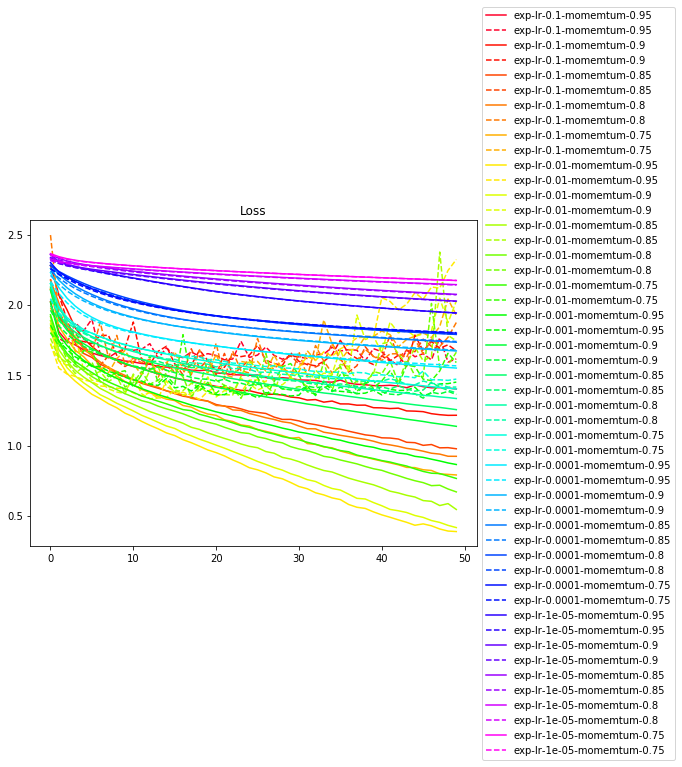

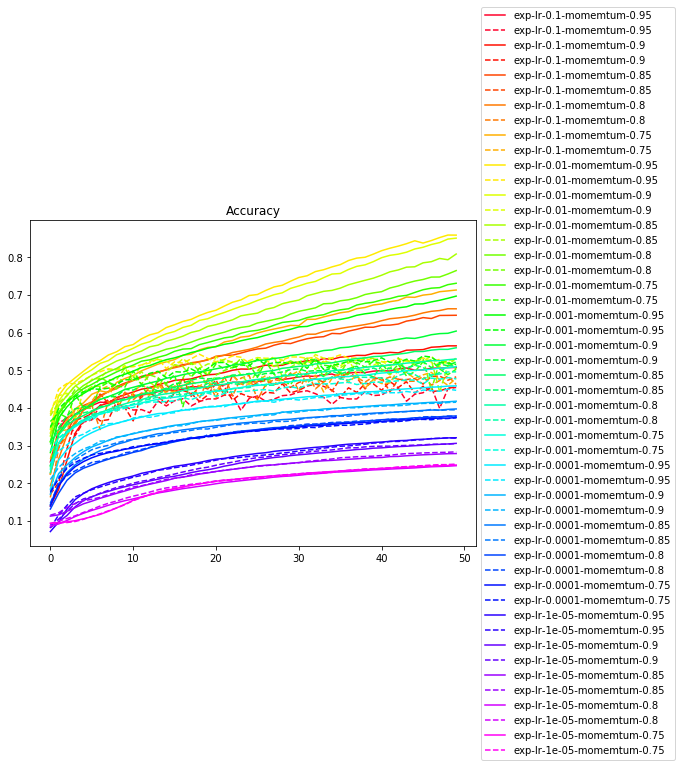

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

####  設定MOMENTUM = [0.95,0.90,0.85,0.80,0.75]，並關閉nesterov

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM_LIST = [0.95,0.90,0.85,0.80,0.75]

In [10]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM_LIST):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.95
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/5

50000/50000 [==============================] - 10s 198us/step - loss: 2.1596 - accuracy: 0.1577 - val_loss: 2.1396 - val_accuracy: 0.1581
Epoch 49/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.1739 - accuracy: 0.1512 - val_loss: 2.1592 - val_accuracy: 0.1549
Epoch 50/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.1960 - accuracy: 0.1543 - val_loss: 2.1285 - val_accuracy: 0.1705
Experiment with LR = 0.100000, Momentum = 0.90
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________

50000/50000 [==============================] - 9s 185us/step - loss: 1.3007 - accuracy: 0.5358 - val_loss: 1.5630 - val_accuracy: 0.4682
Epoch 46/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.3133 - accuracy: 0.5316 - val_loss: 1.6158 - val_accuracy: 0.4602
Epoch 47/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.2890 - accuracy: 0.5396 - val_loss: 1.5897 - val_accuracy: 0.4654
Epoch 48/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.2855 - accuracy: 0.5418 - val_loss: 1.6308 - val_accuracy: 0.4451
Epoch 49/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.2846 - accuracy: 0.5419 - val_loss: 1.6387 - val_accuracy: 0.4687
Epoch 50/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.2955 - accuracy: 0.5372 - val_loss: 1.6245 - val_accuracy: 0.4700
Experiment with LR = 0.100000, Momentum = 0.85
Model: "model_1"
______________________________________________________

50000/50000 [==============================] - 9s 190us/step - loss: 1.0989 - accuracy: 0.6048 - val_loss: 1.5852 - val_accuracy: 0.4751
Epoch 43/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.0870 - accuracy: 0.6090 - val_loss: 1.6214 - val_accuracy: 0.4753
Epoch 44/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.0873 - accuracy: 0.6067 - val_loss: 1.6060 - val_accuracy: 0.4784
Epoch 45/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.0598 - accuracy: 0.6182 - val_loss: 1.6702 - val_accuracy: 0.4745
Epoch 46/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.0520 - accuracy: 0.6193 - val_loss: 1.6706 - val_accuracy: 0.4724
Epoch 47/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.0413 - accuracy: 0.6220 - val_loss: 1.6222 - val_accuracy: 0.4898
Epoch 48/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.0379 - accuracy: 0.6261 - val_loss:

50000/50000 [==============================] - 9s 184us/step - loss: 0.9684 - accuracy: 0.6503 - val_loss: 1.6764 - val_accuracy: 0.4964
Epoch 40/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.9606 - accuracy: 0.6546 - val_loss: 1.6589 - val_accuracy: 0.4846
Epoch 41/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.9449 - accuracy: 0.6590 - val_loss: 1.6491 - val_accuracy: 0.4780
Epoch 42/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.9361 - accuracy: 0.6618 - val_loss: 1.6022 - val_accuracy: 0.4993
Epoch 43/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.9227 - accuracy: 0.6651 - val_loss: 1.7128 - val_accuracy: 0.4885
Epoch 44/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.9292 - accuracy: 0.6636 - val_loss: 1.6868 - val_accuracy: 0.4939
Epoch 45/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.9053 - accuracy: 0.6714 - val_loss:

50000/50000 [==============================] - 9s 187us/step - loss: 0.9245 - accuracy: 0.6667 - val_loss: 1.5690 - val_accuracy: 0.4969
Epoch 37/50
50000/50000 [==============================] - 9s 190us/step - loss: 0.9070 - accuracy: 0.6718 - val_loss: 1.7041 - val_accuracy: 0.4915
Epoch 38/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.8824 - accuracy: 0.6800 - val_loss: 1.6749 - val_accuracy: 0.4965
Epoch 39/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.8874 - accuracy: 0.6801 - val_loss: 1.6704 - val_accuracy: 0.4836
Epoch 40/50
50000/50000 [==============================] - 9s 179us/step - loss: 0.8667 - accuracy: 0.6850 - val_loss: 1.6075 - val_accuracy: 0.5138
Epoch 41/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.8523 - accuracy: 0.6927 - val_loss: 1.6667 - val_accuracy: 0.4990
Epoch 42/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.8373 - accuracy: 0.6966 - val_loss:

50000/50000 [==============================] - 9s 177us/step - loss: 0.8896 - accuracy: 0.6799 - val_loss: 1.4302 - val_accuracy: 0.5285
Epoch 34/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.8859 - accuracy: 0.6836 - val_loss: 1.4371 - val_accuracy: 0.5220
Epoch 35/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.8640 - accuracy: 0.6893 - val_loss: 1.4269 - val_accuracy: 0.5396
Epoch 36/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.8645 - accuracy: 0.6900 - val_loss: 1.4284 - val_accuracy: 0.5286
Epoch 37/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.8257 - accuracy: 0.7036 - val_loss: 1.4859 - val_accuracy: 0.5289
Epoch 38/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.8136 - accuracy: 0.7063 - val_loss: 1.4552 - val_accuracy: 0.5313
Epoch 39/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.7897 - accuracy: 0.7138 - val_loss:

50000/50000 [==============================] - 9s 177us/step - loss: 0.9139 - accuracy: 0.6746 - val_loss: 1.4004 - val_accuracy: 0.5360
Epoch 31/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.8957 - accuracy: 0.6806 - val_loss: 1.4087 - val_accuracy: 0.5248
Epoch 32/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.8815 - accuracy: 0.6860 - val_loss: 1.3802 - val_accuracy: 0.5397
Epoch 33/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.8607 - accuracy: 0.6944 - val_loss: 1.3765 - val_accuracy: 0.5421
Epoch 34/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.8356 - accuracy: 0.7015 - val_loss: 1.4385 - val_accuracy: 0.5270
Epoch 35/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.8092 - accuracy: 0.7103 - val_loss: 1.4252 - val_accuracy: 0.5389
Epoch 36/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.8094 - accuracy: 0.7106 - val_loss:

50000/50000 [==============================] - 11s 213us/step - loss: 1.0013 - accuracy: 0.6450 - val_loss: 1.3733 - val_accuracy: 0.5239
Epoch 28/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.9819 - accuracy: 0.6528 - val_loss: 1.4302 - val_accuracy: 0.5078
Epoch 29/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.9692 - accuracy: 0.6567 - val_loss: 1.3312 - val_accuracy: 0.5378
Epoch 30/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.9530 - accuracy: 0.6607 - val_loss: 1.3389 - val_accuracy: 0.5411
Epoch 31/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.9394 - accuracy: 0.6675 - val_loss: 1.4003 - val_accuracy: 0.5301
Epoch 32/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.9153 - accuracy: 0.6758 - val_loss: 1.4075 - val_accuracy: 0.5324
Epoch 33/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.9012 - accuracy: 0.6816 - va

50000/50000 [==============================] - 11s 223us/step - loss: 1.1048 - accuracy: 0.6091 - val_loss: 1.4234 - val_accuracy: 0.5109
Epoch 25/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.0853 - accuracy: 0.6156 - val_loss: 1.3965 - val_accuracy: 0.5192
Epoch 26/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.0712 - accuracy: 0.6198 - val_loss: 1.3562 - val_accuracy: 0.5228
Epoch 27/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.0612 - accuracy: 0.6258 - val_loss: 1.3779 - val_accuracy: 0.5171
Epoch 28/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.0367 - accuracy: 0.6311 - val_loss: 1.4123 - val_accuracy: 0.5088
Epoch 29/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.0344 - accuracy: 0.6338 - val_loss: 1.4332 - val_accuracy: 0.5079
Epoch 30/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.0054 - accuracy: 0.6454 - va

50000/50000 [==============================] - 11s 220us/step - loss: 1.1701 - accuracy: 0.5895 - val_loss: 1.4748 - val_accuracy: 0.4933
Epoch 22/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.1689 - accuracy: 0.5869 - val_loss: 1.3648 - val_accuracy: 0.5156
Epoch 23/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.1482 - accuracy: 0.5947 - val_loss: 1.3324 - val_accuracy: 0.5302
Epoch 24/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.1263 - accuracy: 0.6016 - val_loss: 1.3600 - val_accuracy: 0.5172
Epoch 25/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.1122 - accuracy: 0.6072 - val_loss: 1.4396 - val_accuracy: 0.5049
Epoch 26/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.1057 - accuracy: 0.6119 - val_loss: 1.3423 - val_accuracy: 0.5245
Epoch 27/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.0804 - accuracy: 0.6199 - va

50000/50000 [==============================] - 11s 226us/step - loss: 1.3487 - accuracy: 0.5221 - val_loss: 1.4057 - val_accuracy: 0.5058
Epoch 19/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.3328 - accuracy: 0.5288 - val_loss: 1.4278 - val_accuracy: 0.4892
Epoch 20/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.3145 - accuracy: 0.5343 - val_loss: 1.3861 - val_accuracy: 0.5072
Epoch 21/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.3034 - accuracy: 0.5385 - val_loss: 1.4125 - val_accuracy: 0.4968
Epoch 22/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.3026 - accuracy: 0.5401 - val_loss: 1.3999 - val_accuracy: 0.5014
Epoch 23/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.2810 - accuracy: 0.5483 - val_loss: 1.3687 - val_accuracy: 0.5127
Epoch 24/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.2702 - accuracy: 0.5520 - va

50000/50000 [==============================] - 12s 235us/step - loss: 1.5024 - accuracy: 0.4722 - val_loss: 1.5462 - val_accuracy: 0.4472
Epoch 16/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.4887 - accuracy: 0.4769 - val_loss: 1.5292 - val_accuracy: 0.4641
Epoch 17/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.4754 - accuracy: 0.4810 - val_loss: 1.4975 - val_accuracy: 0.4672
Epoch 18/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.4611 - accuracy: 0.4882 - val_loss: 1.4798 - val_accuracy: 0.4738
Epoch 19/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.4477 - accuracy: 0.4909 - val_loss: 1.4863 - val_accuracy: 0.4712
Epoch 20/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.4392 - accuracy: 0.4940 - val_loss: 1.4792 - val_accuracy: 0.4754
Epoch 21/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.4249 - accuracy: 0.5004 - va

50000/50000 [==============================] - 11s 220us/step - loss: 1.6248 - accuracy: 0.4336 - val_loss: 1.6260 - val_accuracy: 0.4327
Epoch 13/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.6091 - accuracy: 0.4395 - val_loss: 1.6113 - val_accuracy: 0.4385
Epoch 14/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5937 - accuracy: 0.4444 - val_loss: 1.6041 - val_accuracy: 0.4299
Epoch 15/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5799 - accuracy: 0.4480 - val_loss: 1.5972 - val_accuracy: 0.4421
Epoch 16/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.5674 - accuracy: 0.4519 - val_loss: 1.5808 - val_accuracy: 0.4492
Epoch 17/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5525 - accuracy: 0.4585 - val_loss: 1.5651 - val_accuracy: 0.4525
Epoch 18/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5446 - accuracy: 0.4594 - va

50000/50000 [==============================] - 11s 221us/step - loss: 1.7123 - accuracy: 0.4025 - val_loss: 1.7094 - val_accuracy: 0.4067
Epoch 10/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.6937 - accuracy: 0.4070 - val_loss: 1.6975 - val_accuracy: 0.4084
Epoch 11/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.6770 - accuracy: 0.4134 - val_loss: 1.6798 - val_accuracy: 0.4150
Epoch 12/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.6621 - accuracy: 0.4190 - val_loss: 1.6596 - val_accuracy: 0.4259
Epoch 13/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.6466 - accuracy: 0.4234 - val_loss: 1.6552 - val_accuracy: 0.4225
Epoch 14/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.6325 - accuracy: 0.4296 - val_loss: 1.6367 - val_accuracy: 0.4278
Epoch 15/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.6195 - accuracy: 0.4357 - va

50000/50000 [==============================] - 11s 226us/step - loss: 1.8099 - accuracy: 0.3672 - val_loss: 1.8005 - val_accuracy: 0.3669
Epoch 7/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7852 - accuracy: 0.3759 - val_loss: 1.7814 - val_accuracy: 0.3787
Epoch 8/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7636 - accuracy: 0.3846 - val_loss: 1.7636 - val_accuracy: 0.3803
Epoch 9/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.7447 - accuracy: 0.3898 - val_loss: 1.7422 - val_accuracy: 0.3887
Epoch 10/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7264 - accuracy: 0.3971 - val_loss: 1.7239 - val_accuracy: 0.3992
Epoch 11/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.7105 - accuracy: 0.4032 - val_loss: 1.7068 - val_accuracy: 0.4036
Epoch 12/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.6956 - accuracy: 0.4077 - val_l

50000/50000 [==============================] - 9s 177us/step - loss: 2.0584 - accuracy: 0.2908 - val_loss: 2.0255 - val_accuracy: 0.3017
Epoch 4/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.9997 - accuracy: 0.3095 - val_loss: 1.9777 - val_accuracy: 0.3136
Epoch 5/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.9565 - accuracy: 0.3232 - val_loss: 1.9383 - val_accuracy: 0.3304
Epoch 6/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.9235 - accuracy: 0.3331 - val_loss: 1.9098 - val_accuracy: 0.3388
Epoch 7/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.8973 - accuracy: 0.3418 - val_loss: 1.8869 - val_accuracy: 0.3447
Epoch 8/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.8759 - accuracy: 0.3477 - val_loss: 1.8669 - val_accuracy: 0.3500
Epoch 9/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.8576 - accuracy: 0.3544 - val_loss: 1.849

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 183us/step - loss: 2.2731 - accuracy: 0.1460 - val_loss: 2.2297 - val_accuracy: 0.1966
Epoch 2/50
50000/50000 [==============================] - 9s 181us/step - loss: 2.2003 - accuracy: 0.2171 - val_loss: 2.1733 - val_accuracy: 0.2271
Epoch 3/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.1476 - accuracy: 0.2455 - val_loss: 2.1245 - val_accuracy: 0.2540
Epoch 4/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.1014 - accuracy: 0.2655 - val_loss: 2.0822 - val_accuracy: 0.2700
Epoch 5/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.0622 - accuracy: 0.2784 - val_loss: 2.0472 - val_accuracy: 0.2794
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.0301 - accuracy: 0.2892 - val_loss: 2.0191 - val_accuracy: 0.2886
Epoch 7/50
50000/50000 [==============================] - 9s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.2960 - accuracy: 0.1499 - val_loss: 2.2528 - val_accuracy: 0.1697
Epoch 2/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.2313 - accuracy: 0.1854 - val_loss: 2.2083 - val_accuracy: 0.2071
Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.1907 - accuracy: 0.2135 - val_loss: 2.1697 - val_accuracy: 0.2306
Epoch 4/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.1543 - accuracy: 0.2345 - val_loss: 2.1351 - val_accuracy: 0.2469
Epoch 5/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.1223 - accuracy: 0.2497 - val_loss: 2.1052 - val_accuracy: 0.2616
Epoch 6/50
50000/50000 [==============================] - 10s 190us/step - loss: 2.0941 - accuracy: 0.2626 - val_loss: 2.0779 - val_accuracy: 0.2700
Epoch 7/50
50000/50000 [==============================] - 9s 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.3062 - accuracy: 0.1340 - val_loss: 2.2565 - val_accuracy: 0.1796
Epoch 2/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.2335 - accuracy: 0.1923 - val_loss: 2.2108 - val_accuracy: 0.2127
Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.1919 - accuracy: 0.2189 - val_loss: 2.1729 - val_accuracy: 0.2399
Epoch 4/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.1560 - accuracy: 0.2360 - val_loss: 2.1393 - val_accuracy: 0.2521
Epoch 5/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.1255 - accuracy: 0.2480 - val_loss: 2.1112 - val_accuracy: 0.2619
Epoch 6/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.0994 - accuracy: 0.2578 - val_loss: 2.0870 - val_accuracy: 0.2757s: 2.0995 - accuracy: 0.
Epoch 7/50
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.3002 - accuracy: 0.1341 - val_loss: 2.2640 - val_accuracy: 0.1625
Epoch 2/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2449 - accuracy: 0.1834 - val_loss: 2.2290 - val_accuracy: 0.2003
Epoch 3/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.2138 - accuracy: 0.2077 - val_loss: 2.2012 - val_accuracy: 0.2150
Epoch 4/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.1875 - accuracy: 0.2215 - val_loss: 2.1766 - val_accuracy: 0.2242
Epoch 5/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1643 - accuracy: 0.2313 - val_loss: 2.1553 - val_accuracy: 0.2350
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.1437 - accuracy: 0.2391 - val_loss: 2.1359 - val_accuracy: 0.2382
Epoch 7/50
50000/50000 [==============================] - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.3315 - accuracy: 0.1010 - val_loss: 2.3027 - val_accuracy: 0.1139
Epoch 2/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2896 - accuracy: 0.1290 - val_loss: 2.2781 - val_accuracy: 0.1410
Epoch 3/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.2693 - accuracy: 0.1516 - val_loss: 2.2608 - val_accuracy: 0.1605
Epoch 4/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.2530 - accuracy: 0.1726 - val_loss: 2.2459 - val_accuracy: 0.1814
Epoch 5/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2385 - accuracy: 0.1912 - val_loss: 2.2323 - val_accuracy: 0.1956
Epoch 6/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.2252 - accuracy: 0.2026 - val_loss: 2.2197 - val_accuracy: 0.2048
Epoch 7/50
50000/50000 [==============================] - 10

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.3679 - accuracy: 0.1108 - val_loss: 2.3314 - val_accuracy: 0.1132
Epoch 2/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.3144 - accuracy: 0.1156 - val_loss: 2.3031 - val_accuracy: 0.1179
Epoch 3/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.2942 - accuracy: 0.1264 - val_loss: 2.2875 - val_accuracy: 0.1291
Epoch 4/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.2810 - accuracy: 0.1367 - val_loss: 2.2756 - val_accuracy: 0.1397
Epoch 5/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.2699 - accuracy: 0.1487 - val_loss: 2.2649 - val_accuracy: 0.1525
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.2594 - accuracy: 0.1614 - val_loss: 2.2547 - val_accuracy: 0.1647
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.3633 - accuracy: 0.1048 - val_loss: 2.3315 - val_accuracy: 0.1178
Epoch 2/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.3161 - accuracy: 0.1271 - val_loss: 2.3002 - val_accuracy: 0.1356
Epoch 3/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.2927 - accuracy: 0.1364 - val_loss: 2.2826 - val_accuracy: 0.1419
Epoch 4/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.2785 - accuracy: 0.1427 - val_loss: 2.2708 - val_accuracy: 0.1519
Epoch 5/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.2681 - accuracy: 0.1512 - val_loss: 2.2616 - val_accuracy: 0.1629
Epoch 6/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.2595 - accuracy: 0.1629 - val_loss: 2.2536 - val_accuracy: 0.1729
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.3376 - accuracy: 0.0911 - val_loss: 2.3272 - val_accuracy: 0.0942
Epoch 2/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.3198 - accuracy: 0.0983 - val_loss: 2.3124 - val_accuracy: 0.1038
Epoch 3/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.3073 - accuracy: 0.1071 - val_loss: 2.3015 - val_accuracy: 0.1129
Epoch 4/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.2978 - accuracy: 0.1165 - val_loss: 2.2929 - val_accuracy: 0.1228
Epoch 5/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.2900 - accuracy: 0.1257 - val_loss: 2.2857 - val_accuracy: 0.1327
Epoch 6/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.2832 - accuracy: 0.1356 - val_loss: 2.2793 - val_accuracy: 0.1457
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.3343 - accuracy: 0.0975 - val_loss: 2.3214 - val_accuracy: 0.1035
Epoch 2/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.3118 - accuracy: 0.1035 - val_loss: 2.3036 - val_accuracy: 0.1132
Epoch 3/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.2974 - accuracy: 0.1148 - val_loss: 2.2917 - val_accuracy: 0.1240
Epoch 4/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.2873 - accuracy: 0.1269 - val_loss: 2.2832 - val_accuracy: 0.1335
Epoch 5/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.2799 - accuracy: 0.1382 - val_loss: 2.2767 - val_accuracy: 0.1428
Epoch 6/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.2740 - accuracy: 0.1472 - val_loss: 2.2714 - val_accuracy: 0.1500
Epoch 7/50
50000/50000 [==============================] 

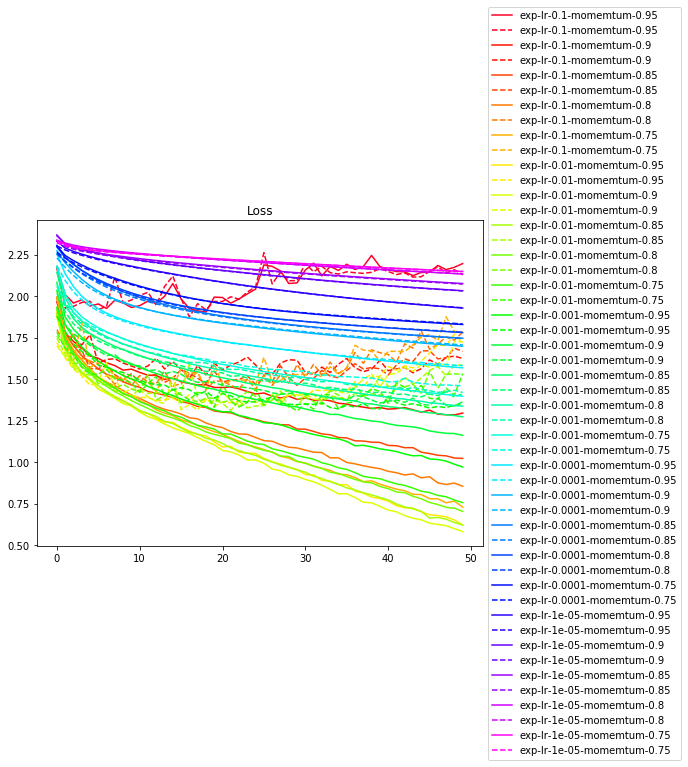

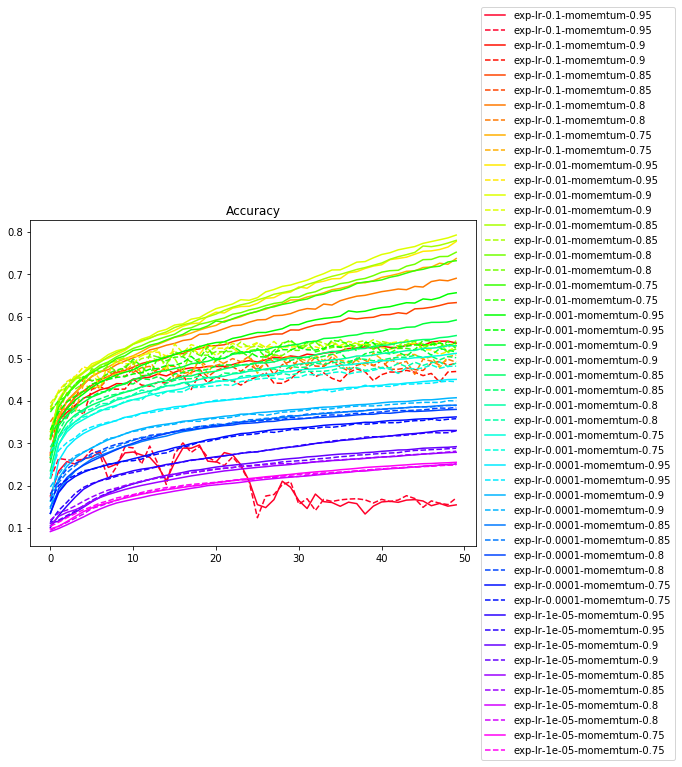

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()